# 🎓 Student Performance Prediction
This notebook presents a complete machine learning workflow to predict student academic performance using multiple linear regression and other models.

We will explore:
- Data cleaning and preparation
- Exploratory Data Analysis (EDA)
- Model training and evaluation
- Feature importance analysis

## Load and inspect the dataset

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [44]:
le = LabelEncoder()

# Load dataset
df = pd.read_csv("../data/Student_Performance.csv")
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [45]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [46]:
print(df.duplicated().sum())
df.drop_duplicates()

127


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


## Exploratory Data Analysis

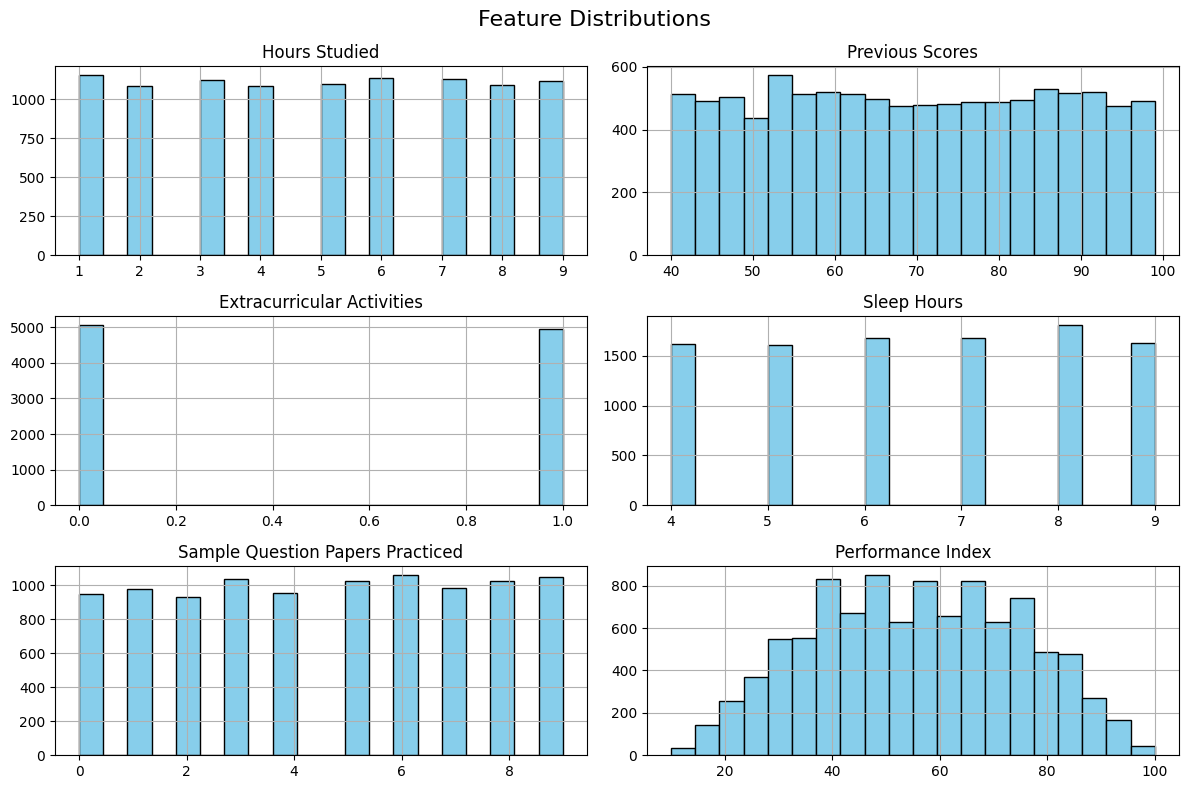

In [47]:
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

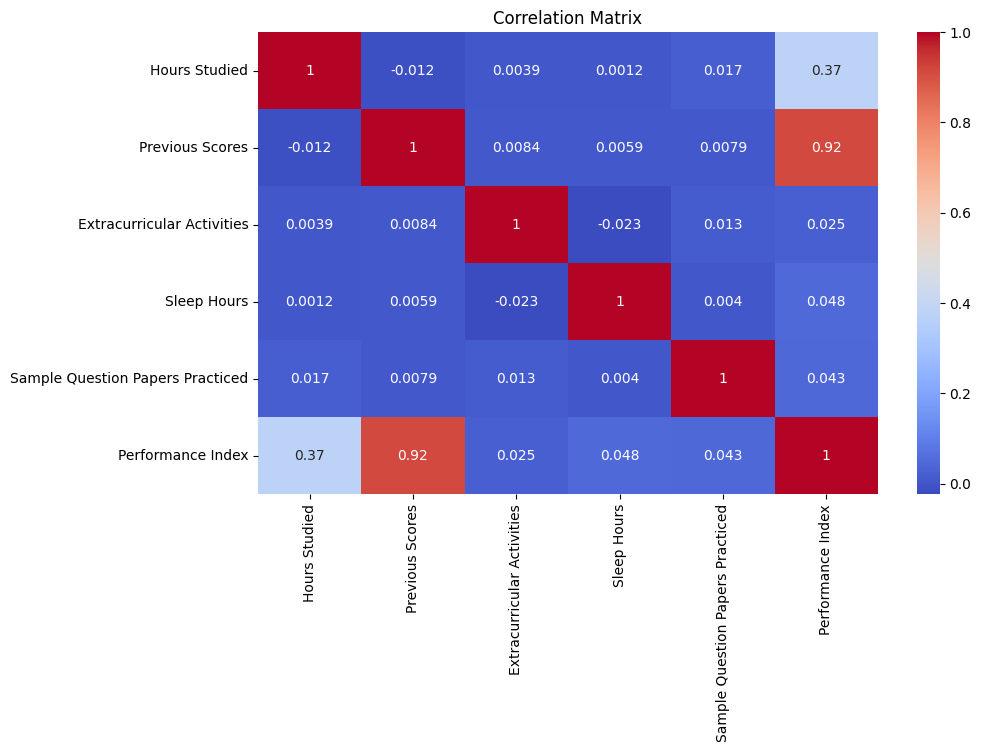

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

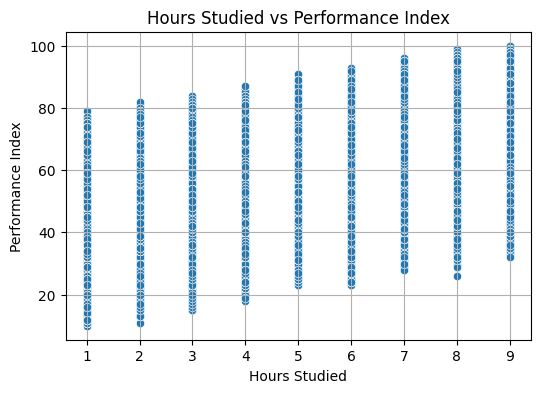

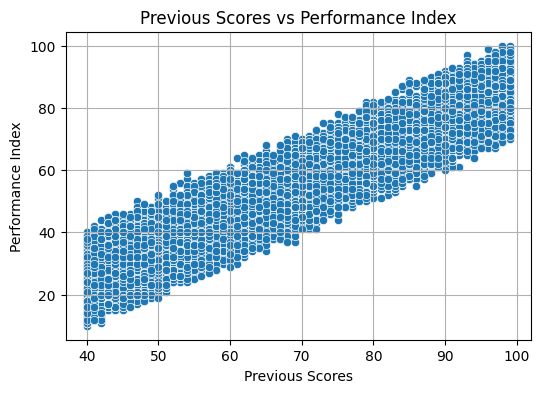

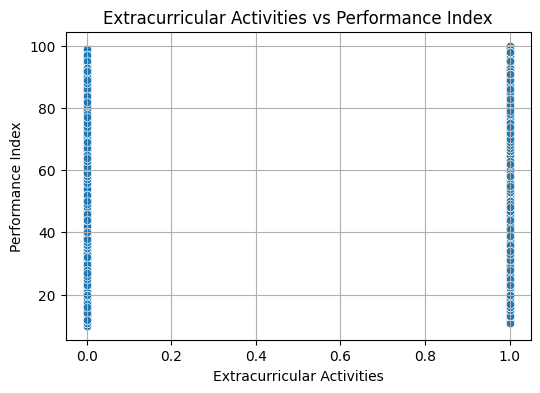

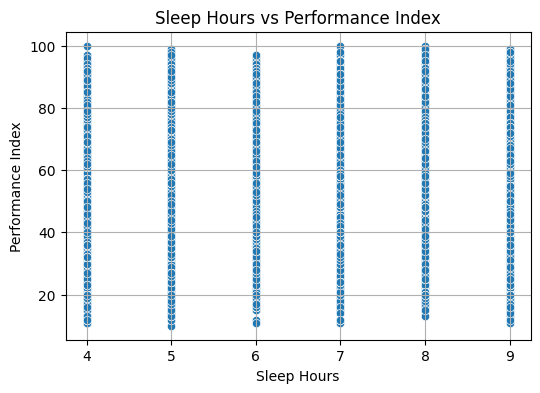

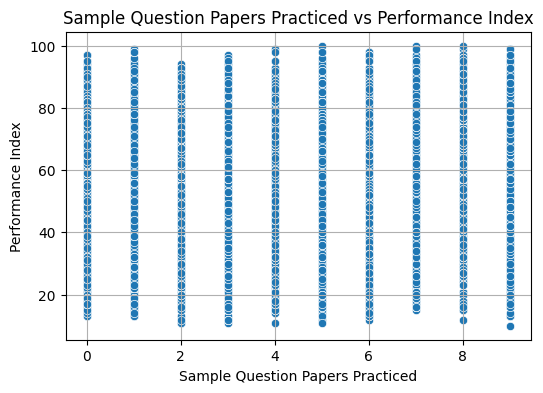

In [49]:
features = df.drop("Performance Index", axis=1).columns
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df["Performance Index"])
    plt.title(f"{feature} vs Performance Index")
    plt.xlabel(feature)
    plt.ylabel("Performance Index")
    plt.grid(True)
    plt.show()

## Data Preprocessing

In [50]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results)
results_df.sort_values("R2", ascending=False)

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,1.611121,4.082628,2.020552,0.988983
1,Ridge Regression,1.611223,4.083211,2.020696,0.988982
4,Random Forest,1.816016,5.171924,2.274187,0.986044
2,Lasso Regression,2.168411,7.516813,2.741681,0.979716
3,Decision Tree,2.334583,8.770069,2.961430,0.976335


In [52]:
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    cv_results[name] = {
        'CV Mean RMSE': rmse_scores.mean(),
        'CV Std': rmse_scores.std()
    }

cv_df = pd.DataFrame(cv_results).T.sort_values('CV Mean RMSE')
cv_df

,CV Mean RMSE,CV Std
Ridge Regression,2.038224,0.025927
Linear Regression,2.038224,0.025928
Lasso Regression,2.205364,0.032351
Random Forest,2.340660,0.019859
Decision Tree,3.007881,0.018305


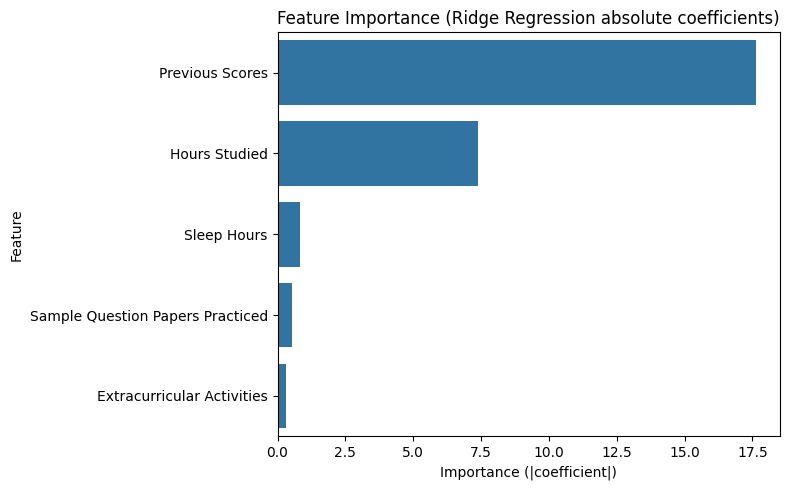

,Feature,Coefficient,Importance (abs)
1,Previous Scores,17.635057,17.635057
0,Hours Studied,7.400393,7.400393
3,Sleep Hours,0.809936,0.809936


In [53]:
best_model = Ridge()
best_model.fit(X_train_scaled, y_train)

coef = best_model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef,
    "Importance (abs)": np.abs(coef)
}).sort_values("Importance (abs)", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance (abs)", y="Feature", data=coef_df)
plt.title("Feature Importance (Ridge Regression absolute coefficients)")
plt.xlabel("Importance (|coefficient|)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

coef_df.head(3)

## Save model

In [54]:
joblib.dump(best_model, "../models/model.joblib")
joblib.dump(scaler, "../models/scaler.joblib")

['../models/scaler.joblib']